In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
cars_data=pd.read_csv('car details v3.csv')

In [4]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
cars_data.drop(columns=['torque','max_power'],inplace=True)

In [6]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0


In [7]:
cars_data.shape

(8128, 11)

In [8]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
seats            221
dtype: int64

In [9]:
cars_data.dropna(inplace=True)

In [10]:
cars_data.shape

(7907, 11)

In [11]:
cars_data.duplicated().sum()

1189

In [12]:
cars_data.drop_duplicates(inplace=True)

In [13]:
cars_data.shape

(6718, 11)

In [14]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,5.0


In [15]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 629.8+ KB


In [16]:
for col in cars_data.columns:
    print('Unique values of '+col)
    print(cars_data[col].unique())
    print('=========================')

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [17]:
cars_data['brand'] = cars_data['name'].apply(lambda x: x.split(' ')[0])

cars_data['model'] = cars_data['name'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [18]:
def get_value(value):
    value=value.split(' ')[0]
    return value.strip(' ')

In [19]:
cars_data['mileage']=cars_data['mileage'].apply(get_value)

In [20]:
cars_data['engine']=cars_data['engine'].apply(get_value)

In [21]:
cars_data.drop(columns=['name'],inplace=True)

In [22]:
cars_data['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [23]:
cars_data['brand'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault','Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz','Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus','Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force','Ambassador', 'Ashok', 'Isuzu', 'Opel'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],inplace=True)

C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\3627417618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['brand'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault','Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz','Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus','Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force','Ambassador', 'Ashok', 'Isuzu', 'Opel'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],inp

In [24]:
cars_data.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2],inplace=True)

C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\635176269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2],inplace=True)
C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\635176269.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [26]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [27]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3],inplace=True)

C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\1198113136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3],inplace=True)
C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\1198113136.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [28]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [29]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4],inplace=True)

C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\465725614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4],inplace=True)
C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\465725614.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [30]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [31]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner', 'Test Drive Car'],[1,2,3,4,5],inplace=True)

C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\1091601075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner', 'Test Drive Car'],[1,2,3,4,5],inplace=True)
C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\1091601075.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future b

In [32]:
cars_data['model'].unique()

array(['Swift Dzire VDI', 'Rapid 1.5 TDI Ambition', 'City 2017-2020 EXi',
       ..., 'Nexon 1.5 Revotorq XT',
       'Freestyle Titanium Plus Diesel BSIV',
       'Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [33]:
cars_data['model'].nunique()

1983

In [34]:
unique_models = cars_data['model'].unique()

model_mapping = {model: idx + 1 for idx, model in enumerate(unique_models)}

cars_data['model'] = cars_data['model'].replace(model_mapping)

print(cars_data[['model']].head())


   model
0      1
1      2
2      3
3      4
4      5


C:\Users\GREGAN\AppData\Local\Temp\ipykernel_29436\2567974497.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['model'] = cars_data['model'].replace(model_mapping)


In [35]:
cars_data.reset_index(inplace=True)

In [36]:
cars_data

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,brand,model
0,0,2014,450000,145500,1,1,1,1,23.4,1248,5.0,1,1
1,1,2014,370000,120000,1,1,1,2,21.14,1498,5.0,2,2
2,2,2006,158000,140000,2,1,1,3,17.7,1497,5.0,3,3
3,3,2010,225000,127000,1,1,1,1,23.0,1396,5.0,4,4
4,4,2007,130000,120000,2,1,1,1,16.1,1298,5.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,2013,260000,50000,2,1,1,2,18.9,998,5.0,1,167
6714,8122,2014,475000,80000,1,1,1,2,22.54,1396,5.0,4,544
6715,8123,2013,320000,110000,2,1,1,1,18.5,1197,5.0,4,180
6716,8124,2007,135000,119000,1,1,1,4,16.8,1493,5.0,4,297


In [37]:
cars_data.drop(columns=['index'],inplace=True)

In [38]:
cars_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,brand,model
0,2014,450000,145500,1,1,1,1,23.4,1248,5.0,1,1
1,2014,370000,120000,1,1,1,2,21.14,1498,5.0,2,2
2,2006,158000,140000,2,1,1,3,17.7,1497,5.0,3,3
3,2010,225000,127000,1,1,1,1,23.0,1396,5.0,4,4
4,2007,130000,120000,2,1,1,1,16.1,1298,5.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,2013,260000,50000,2,1,1,2,18.9,998,5.0,1,167
6714,2014,475000,80000,1,1,1,2,22.54,1396,5.0,4,544
6715,2013,320000,110000,2,1,1,1,18.5,1197,5.0,4,180
6716,2007,135000,119000,1,1,1,4,16.8,1493,5.0,4,297


In [39]:
#XGBoost


In [40]:
cars_data['mileage'] = cars_data['mileage'].astype(float)
cars_data['engine'] = cars_data['engine'].astype(float)
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6718 non-null   int64  
 1   selling_price  6718 non-null   int64  
 2   km_driven      6718 non-null   int64  
 3   fuel           6718 non-null   int64  
 4   seller_type    6718 non-null   int64  
 5   transmission   6718 non-null   int64  
 6   owner          6718 non-null   int64  
 7   mileage        6718 non-null   float64
 8   engine         6718 non-null   float64
 9   seats          6718 non-null   float64
 10  brand          6718 non-null   int64  
 11  model          6718 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 629.9 KB


Testing Data Evaluation:
Mean Absolute Error (MAE): 80875.0811243346
Root Mean Squared Error (RMSE): 143085.3056608142
Mean Squared Error (MSE): 20473404696.048622
R-squared (R²): 0.9117671847343445

Training Data Evaluation:
Mean Absolute Error (MAE) on Training Data: 65700.55562433654
Root Mean Squared Error (RMSE) on Training Data: 95605.71103677333
Mean Squared Error (MSE) on Training Data: 9140451982.847002
R-squared (R²) on Training Data: 0.9686117172241211


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


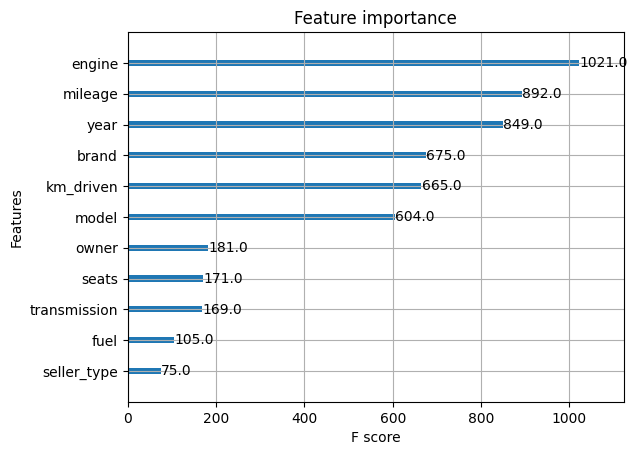

In [67]:
input_data=cars_data.drop(columns=['selling_price'])
output_data=cars_data['selling_price']
X_train, X_test, Y_train, Y_test = train_test_split(input_data, output_data, test_size=0.29, random_state=42)

xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, early_stopping_rounds=10,reg_alpha=0.5,reg_lambda=1.0,subsample=0.8,
    colsample_bytree=0.8, random_state=42)

xgb_model.fit(X_train, Y_train,eval_set=[(X_test, Y_test)], verbose=False)

Y_pred = xgb_model.predict(X_test)
Y_pred_train = xgb_model.predict(X_train)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False) 

print(f"Testing Data Evaluation:")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

mse_train = mean_squared_error(Y_train, Y_pred_train)
r2_train = r2_score(Y_train, Y_pred_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)
rmse_train = mean_squared_error(Y_train, Y_pred_train, squared=False)

print(f"\nTraining Data Evaluation:")
print(f'Mean Absolute Error (MAE) on Training Data: {mae_train}')
print(f'Root Mean Squared Error (RMSE) on Training Data: {rmse_train}')
print(f'Mean Squared Error (MSE) on Training Data: {mse_train}')
print(f'R-squared (R²) on Training Data: {r2_train}')

xgb.plot_importance(xgb_model)
plt.show()




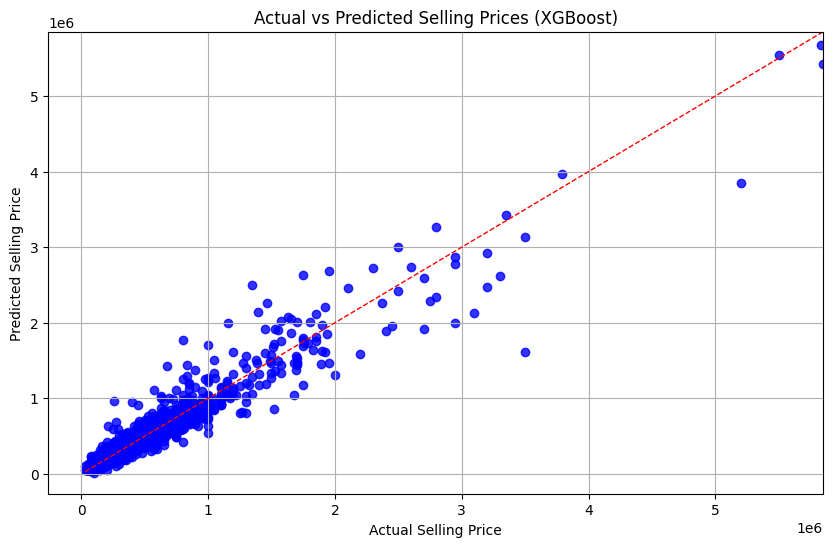

In [42]:


plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.8, color='blue') 
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=1, linestyle='--')
plt.title('Actual vs Predicted Selling Prices (XGBoost)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

offset = (max(Y_test) - min(Y_test)) * 0.05 
plt.xlim([min(Y_test) - offset, max(Y_test)])
plt.ylim([min(Y_test) - offset, max(Y_test)])  

plt.grid()
plt.show()



In [43]:
X_train.head(1)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,brand,model
5646,2018,48000,1,1,1,1,25.4,1186.0,5.0,4,1744


In [44]:
input_data_model=pd.DataFrame([[2022,12000,1,1,1,1,13.99,1494,2,1,110]],columns=['year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','seats','brand','model'])


In [45]:
input_data_model

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats,brand,model
0,2022,12000,1,1,1,1,13.99,1494,2,1,110


In [46]:
xgb_model.predict(input_data_model)

array([912607.4], dtype=float32)

In [47]:
import pickle as pk

In [48]:
pk.dump(xgb_model,open('xgb_model.pkl','wb'))